<a href="https://colab.research.google.com/github/tiendatngcs/news_topic_classifier/blob/master/01_Data_gathering_News_Topic_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Corpus Collecting Demo

In [4]:
markup = requests.get('https://www.nytimes.com/2020/09/17/us/politics/biden-pennsylvania-town-hall.html').text

<!DOCTYPE html>
<html lang="en" class="story"  xmlns:og="http://opengraphprotocol.org/schema/">
  <head>
    <title data-rh="true">Biden, Facing Voters in a 2020 Rarity, Attacks Trump From a Battleground State - The New York Times</title>
    <meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" property="article:published" content="2020-09-18T02:24:54.000Z"/><meta data-rh="true" property="article:modified" content="2020-09-18T04:02:29.095Z"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" content="100000007346859"/><meta data-rh="true" name="nyt_uri" content="nyt://article/0a8d80c7-5f8e-5181-a879-095911bffe11"/><meta data-rh="true" name="pubp_event_id" content="pubp://event/eecff1c6491b4a58b4f5f9408f73b6dd"/><meta data-rh="true" name="description" content="At a town hall event near Scranton, Pa., the Democratic nominee played up his local roots as h
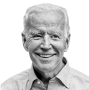
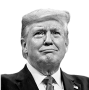

In [5]:
print(markup)

In [ ]:
def url_to_copus(url: str):
  markup = requests.get(url).text
  soup = BeautifulSoup(markup=markup, features='lxml')
  text = [p.text for p in soup.find()]

In [ ]:
url_to_corpus("https://www.nytimes.com/2020/09/17/world/covid-19-coronavirus.html")